## Homework 3


In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn import tree
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

#### Generate dataset using `make_blobs` function in the sklearn.datasets class. Generate 2000 samples with 3 features (X) with one label (y)

In [2]:
X, y = make_blobs(n_samples=2000, n_features=3, random_state=25)
print(X.shape)
X

(2000, 3)


array([[ 5.50780681,  2.10794698, -3.74153168],
       [ 2.97909796, -1.32183807,  2.17300771],
       [ 2.72278358, -1.8090979 ,  0.74557287],
       ...,
       [-7.90564619, -3.57611912, -7.07537631],
       [-7.30542542, -3.14545544, -8.4332532 ],
       [ 4.55715264,  0.26888067,  0.54723823]])

In [3]:
X = pd.DataFrame(X)
y = pd.DataFrame(y)

df = pd.concat([X,y], axis = 1)
df.columns = ["A", "B", "C", "y"]

#### Explore and analyse raw data.

In [4]:
df.head()

,A,B,C,y
0,5.507807,2.107947,-3.741532,0
1,2.979098,-1.321838,2.173008,2
2,2.722784,-1.809098,0.745573,2
3,-7.196371,-1.236946,-6.292234,1
4,-6.296507,-1.789219,-7.429319,1


In [5]:
df.isna().sum()

A    0
B    0
C    0
y    0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
A    2000 non-null float64
B    2000 non-null float64
C    2000 non-null float64
y    2000 non-null int32
dtypes: float64(3), int32(1)
memory usage: 54.8 KB


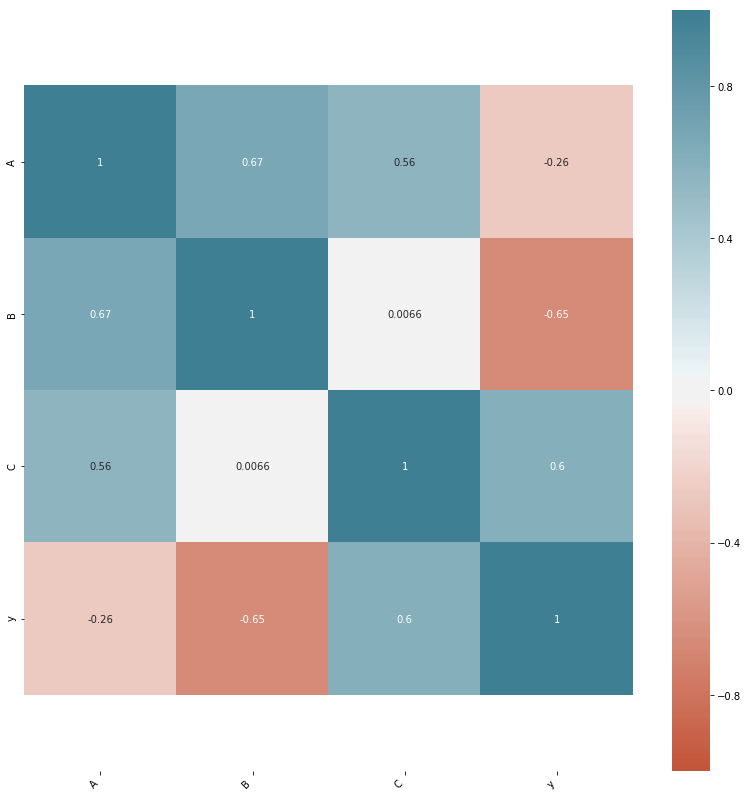

In [7]:
corr = df.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

C:\Users\Mean Machine\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


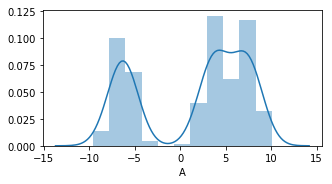

In [8]:
plt.figure(figsize=(5, 2.5))
sns.distplot(df["A"])

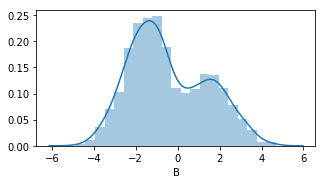

In [9]:
plt.figure(figsize=(5, 2.5))
sns.distplot(df["B"])

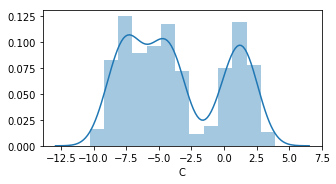

In [10]:
plt.figure(figsize=(5, 2.5))
sns.distplot(df["C"])

#### Do preprocessing for classification.

In [11]:
z = np.abs(stats.zscore(df))

z

array([[6.72778111e-01, 1.39046790e+00, 3.16986570e-02, 1.22428577e+00],
       [2.41961663e-01, 4.73405211e-01, 1.53985852e+00, 1.22551067e+00],
       [1.98293349e-01, 7.38200371e-01, 1.16057362e+00, 1.22551067e+00],
       ...,
       [1.61247358e+00, 1.69846561e+00, 9.17537281e-01, 6.12449111e-04],
       [1.51021389e+00, 1.46442690e+00, 1.27833988e+00, 6.12449111e-04],
       [5.10815038e-01, 3.91050678e-01, 1.10787396e+00, 1.22551067e+00]])

In [12]:
outliers = len(np.where(z>3)[0])
outliers

0

In [13]:
X = df[["A", "B", "C"]]
y = df.y

#### Split your dataset into train and test test (0.7 for train and 0.3 for test).

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Try Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV is a plus)

In [15]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9966666666666667

In [16]:
params = {
    "min_samples_split": range(2,50), 
    "max_depth": range(1,10)
}
clf = GridSearchCV(clf, params, cv = 10, n_jobs = -1)
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_split': range(2, 50), 'max_depth': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
clf.best_params_

{'max_depth': 2, 'min_samples_split': 2}

In [18]:
model_tuned = tree.DecisionTreeClassifier(max_depth = 2, min_samples_split = 2)
model_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
print("Train Score: ", model_tuned.score(X_train,y_train))
print("Test Score: ", model_tuned.score(X_test,y_test))

Train Score:  0.9985714285714286
Test Score:  0.9933333333333333


#### XG Boost

In [20]:
xgc = XGBClassifier()
xgc.fit(X_train, y_train)
xgc.score(X_train,y_train)


[02:12:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Mean Machine\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


1.0

In [21]:
params = {
    "learning_rate": [0.01, 0.1, 0.02, 0.05],
    "max_depth": [3,4,5,6],
    "n_estimators": [100,500,1000,2000]
}
xgc = GridSearchCV(xgc, params, cv = 10, n_jobs = -1, verbose = 2).fit(X_train, y_train)
xgc.best_params_

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  9.9min finished
C:\Users\Mean Machine\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:22:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}

In [22]:
xgc_tuned = XGBClassifier(learning_rate = 0.01, n_estimators = 100, max_depth = 3)
xgc_tuned.fit(X_train, y_train)

print("Train Score: ", xgc_tuned.score(X_train,y_train))
print("Test Score: ", xgc_tuned.score(X_test,y_test))

C:\Users\Mean Machine\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[02:22:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Score:  1.0
Test Score:  1.0


#### Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.

Both Decision Tree and XGboost seem to be perfectly fitting the data.